<a href="https://colab.research.google.com/github/juvian/Manga-Text-Segmentation/blob/master/examples/Manga_Text_Segmentation_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/juvian/Manga-Text-Segmentation.git

In [ ]:
!pip install -r Manga-Text-Segmentation/requirements.txt

In [3]:
import sys

sys.path.insert(0, './Manga-Text-Segmentation/code')

from fastai.vision import *
from dataset import *

In [ ]:
!wget -O model.pkl https://github.com/juvian/Manga-Text-Segmentation/releases/download/v1.0/fold.0.-.final.refined.model.2.pkl

In [5]:
learner = load_learner('.', 'model.pkl')

In [6]:
im = open_image('Manga-Text-Segmentation/images/AisazuNihaIrarenai-009.jpg')
pred = learner.predict(im)[0]

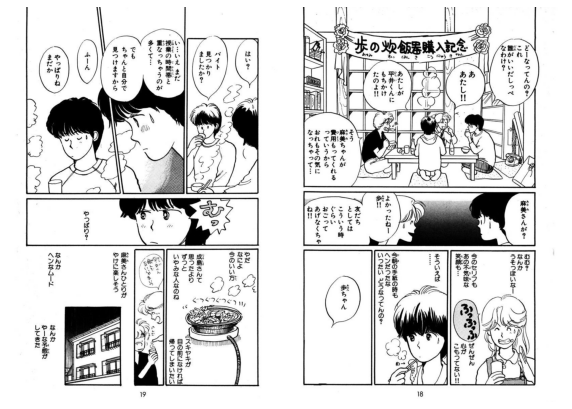

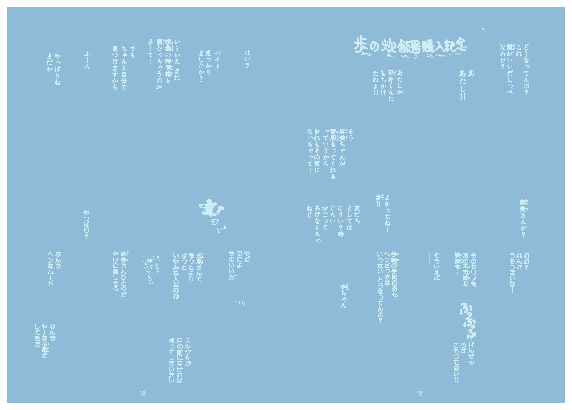

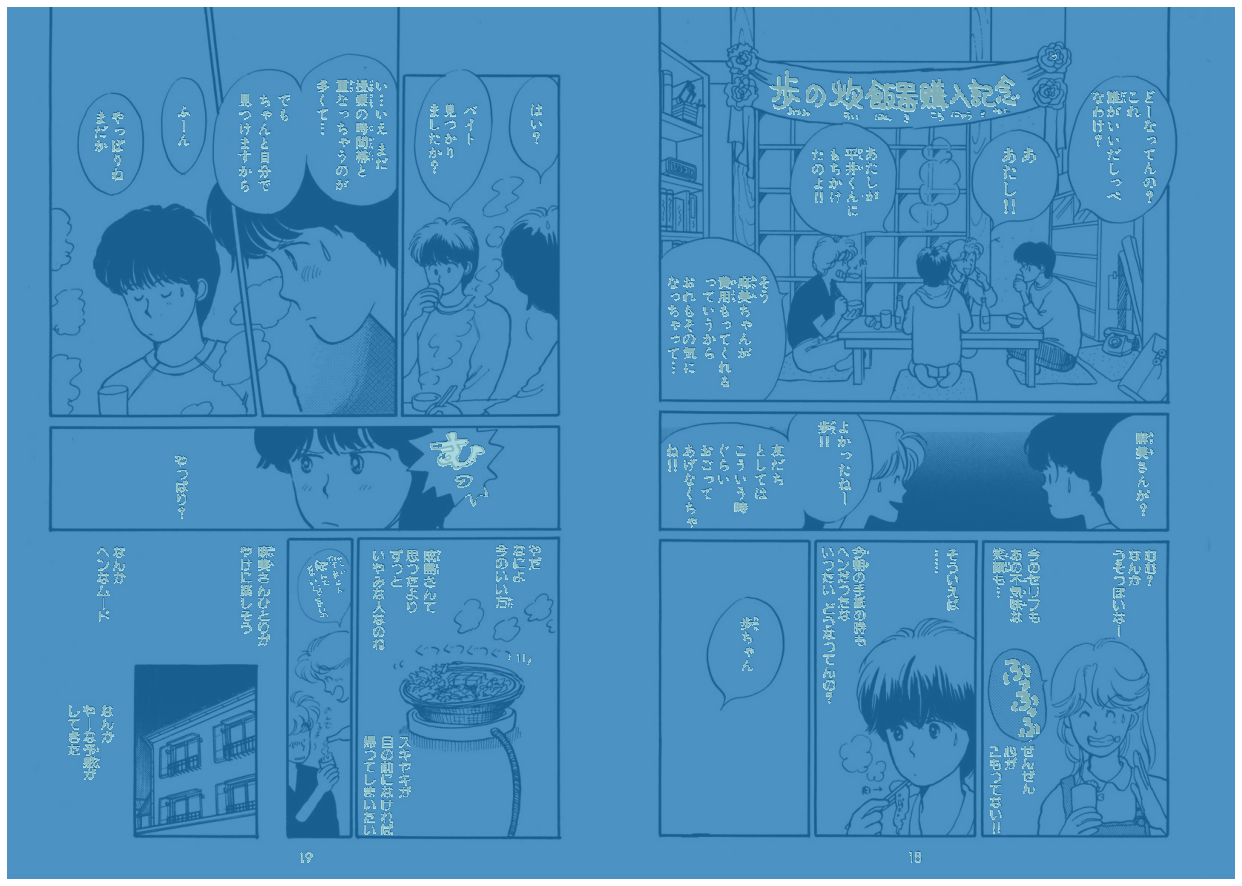

In [7]:
im.show(figsize=(10, 10))
pred.show(figsize=(10, 10))
im.show(y=pred, figsize=(22, 22), alpha=0.8)

In [8]:
#given prediction and ground truth, returns colorized tensor with true positives as green, false positives as red and false negative as white
def colorizePrediction(prediction, truth):
    prediction, truth = prediction[0], truth[0]
    colorized = torch.zeros(4, prediction.shape[0], prediction.shape[1]).int()
    r, g, b, a = colorized[:]
    
    fn = (truth >= 1) & (truth <= 5) & (truth != 3) & (prediction == 0)
    tp = ((truth >= 1) & (truth <= 5)) & (prediction == 1)
    fp = (truth == 0) & (prediction == 1)
    
    r[fp] = 255
    r[fn] = g[fn] = b[fn] = 255
    g[tp] = 255

    a[:, :] = 128
    a[tp | fn | fp] = 255

    return colorized

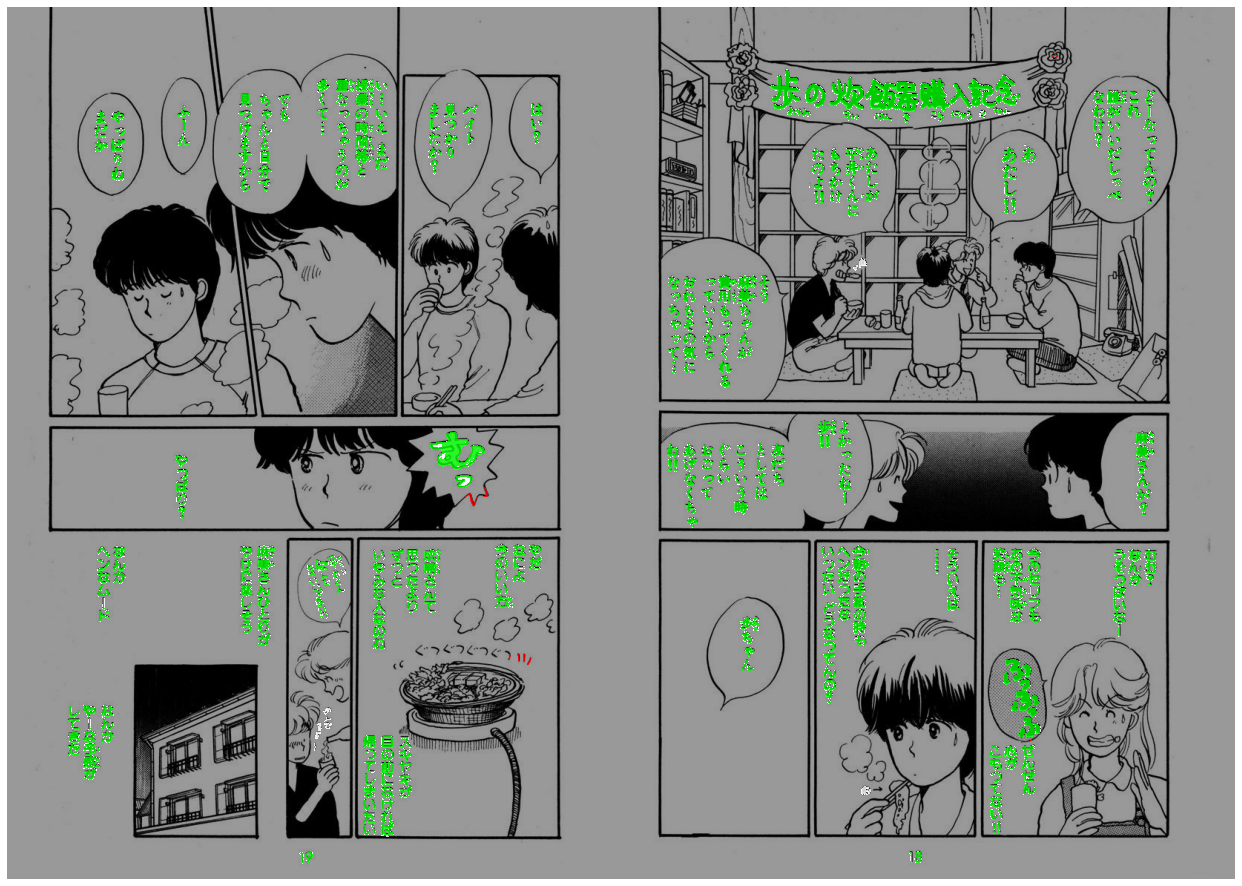

In [9]:
#with truth label, we can get nicer coloring
images = SegLabelListCustom(['Manga-Text-Segmentation/images/AisazuNihaIrarenaipre-processed-truth-009.png'])
images.useCached = False
truth = images.get(0, False)
im.show(y = ImageSegment(colorizePrediction(pred.px, truth.px)), figsize=(22, 22), alpha = 0.8)

In [10]:
#save prediction to use with sickzil
mask = unpad_tensor(pred.px, im.px.shape)[0]

#sickzil works better if we dilate the mask a bit
mask = binary_dilation(mask)

img = torch.ones(im.px.shape) * 255
img[1][mask == 1] = 0
img[2][mask == 1] = 0

i = Im.fromarray(image2np(img).astype(np.uint8))
i.putalpha(Im.fromarray((mask == 1).astype(np.uint8) * 255))

i.save('sickzil-009.png', format='PNG')

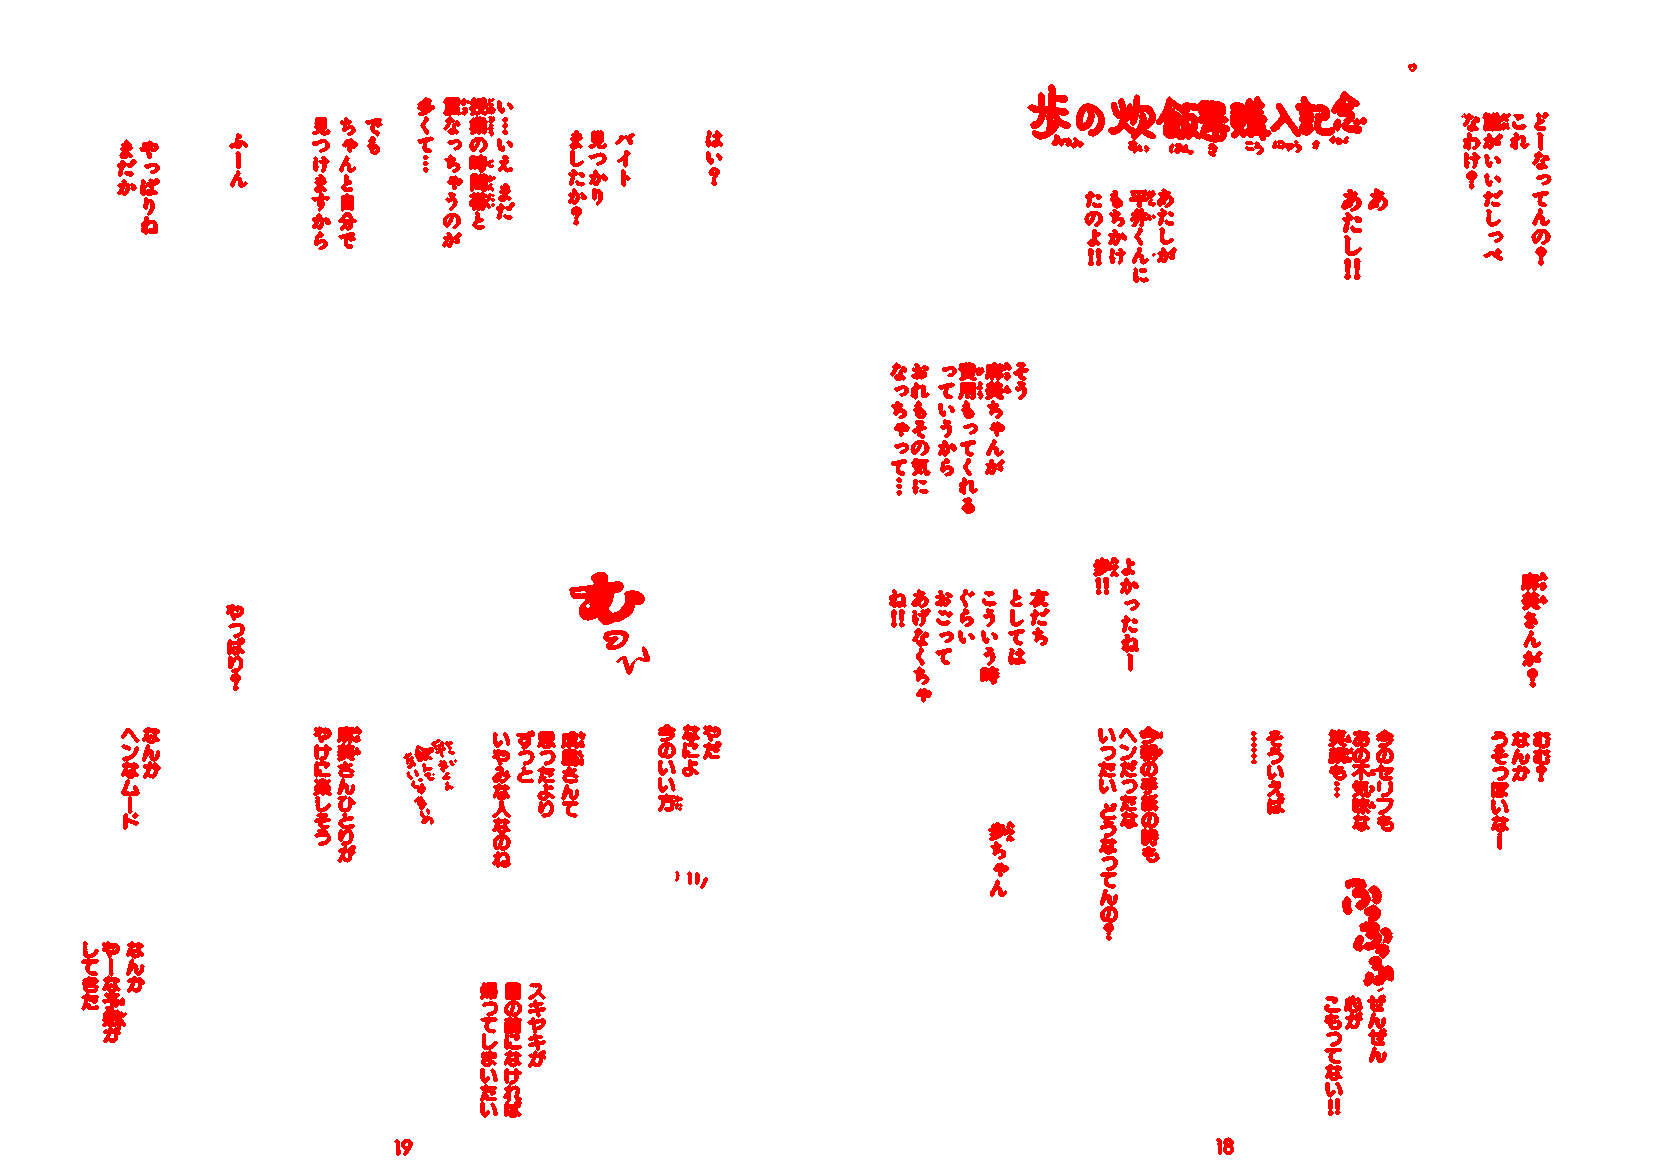

In [11]:
i